In [63]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [64]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


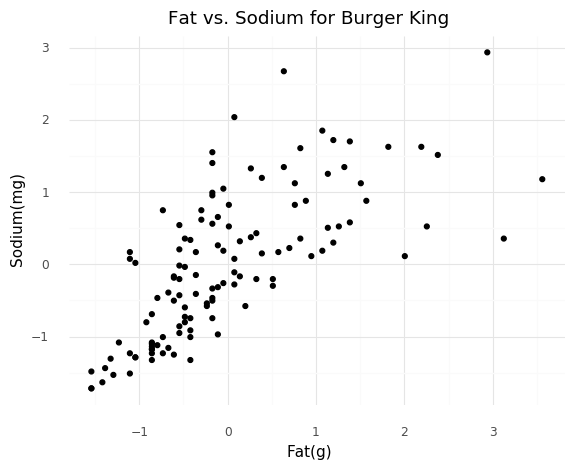

<ggplot: (8793811230335)>

In [87]:
# data
features = ["Fat(g)", "Sodium(mg)"]
X = bk[features]

# z
z = StandardScaler()

X[features] = z.fit_transform(X[features])

# plot

(ggplot(X, aes(x = "Fat(g)", y = "Sodium(mg)")) + geom_point() + theme_minimal() + labs(title = "Fat vs. Sodium for Burger King"))

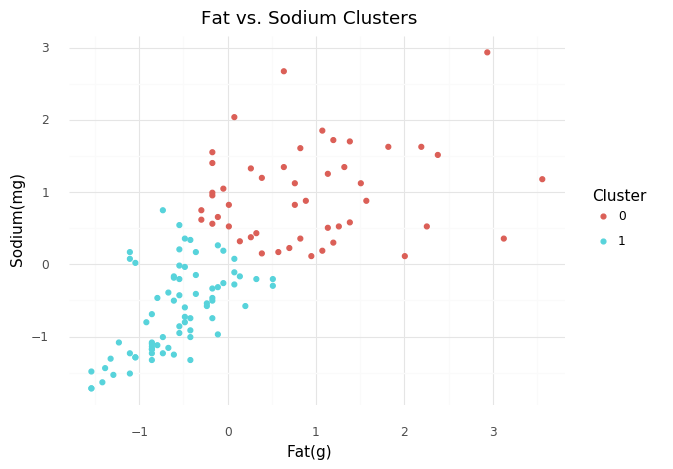

<ggplot: (8793810947307)>

In [88]:
# km
km = KMeans(n_clusters = 2)
km.fit(X[features])

# labels
membership = km.predict(X[features])

X["cluster"] = membership

# plot

(ggplot(X, aes(x = "Fat(g)", y = "Sodium(mg)", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Fat vs. Sodium Clusters") +
scale_color_discrete(name = "Cluster"))

## 3. Evaluate Model

In [89]:
silhouette_score(X[features], membership)

0.4888133809282478

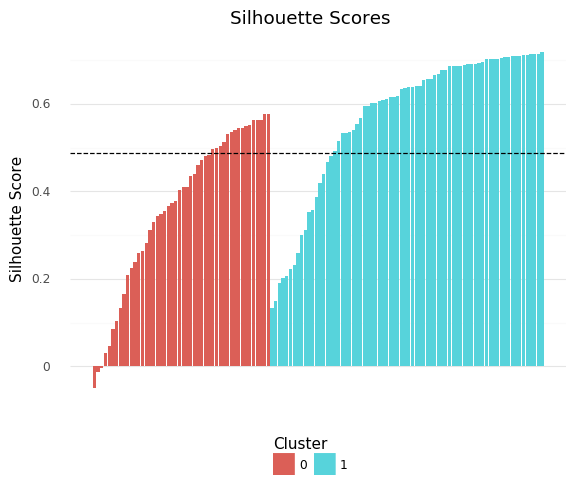

<ggplot: (8793811620846)>

In [90]:
sil_points = silhouette_samples(X[features], membership)
# sil_points

# add silhouette scores and clusters to X
X["sil"] = sil_points
X["cluster"] = membership

# sort X by cluster and silhouette score just to look better
X = X.sort_values(by = ["cluster", "sil"], ascending = True)

# number rows for graphing
X["number"] = range(0,X.shape[0])

X.head()

(ggplot(X, aes(x = "number", y = "sil", fill = "factor(cluster)")) + 
geom_bar(stat = "identity") +
geom_hline(yintercept = np.mean(sil_points), linetype = "dashed") +
theme_minimal() + 
labs(x = "", y = "Silhouette Score", title = "Silhouette Scores") + 
theme(axis_text_x= element_blank(),
panel_grid_major_x= element_blank(),
panel_grid_minor_x= element_blank(),
legend_position= "bottom") +
scale_fill_discrete(name = "Cluster"))

# Another Example

In [91]:
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)",
            "Sugar(g)", "Protein(g)"]

X = bk[features]

z = StandardScaler()

X[features] = z.fit_transform(X[features])

# model

km = KMeans(n_clusters = 5)
km.fit(X)

membership = km.predict(X)
X["cluster"] = membership

print(silhouette_score(X[features], membership))

0.28495780856976133


In [92]:
membership

array([4, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 0, 1, 4, 3,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 4,
       4, 4, 1, 1, 2, 2, 4, 4, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int32)

## Choosing K

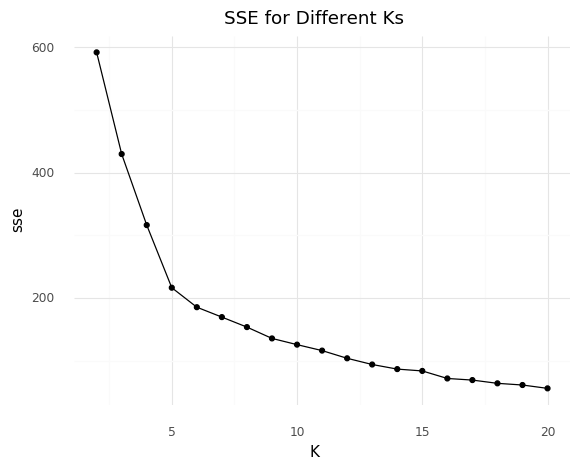

<ggplot: (8793811089249)>

In [93]:
ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

sse = []
sils = []

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks,
                      "sse": sse,
                      "silhouette": sils})

(ggplot(sse_df, aes(x = "K", y = "sse")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "SSE for Different Ks"))

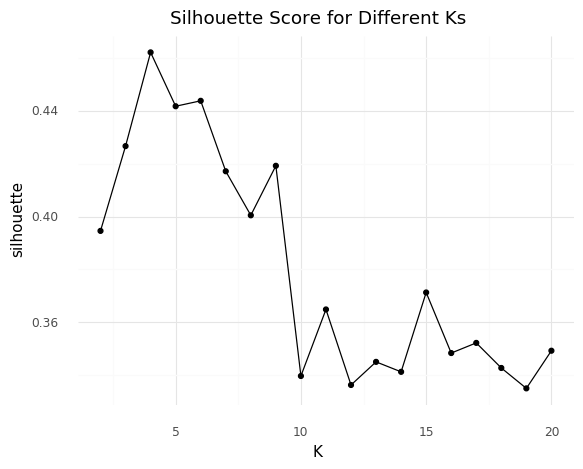

<ggplot: (8793811832510)>

In [94]:
# sil
(ggplot(sse_df, aes(x = "K", y = "silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

# Another Another Example
Data from [here](https://www.kaggle.com/josephvm/major-league-soccer-dataset/version/51?select=all_players.csv).

In [73]:
d = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/all_players.csv"
mls = pd.read_csv(d)
mls.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,RdA,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season
0,Roy Lassiter,TB,F,30,30,2580,27,4,76,49,...,2,0.14,20,39,70,2,0,64.47,1996,reg
1,Raul Diaz Arce,DC,F,28,28,2351,23,2,100,49,...,2,0.08,32,26,35,6,1,49.00,1996,reg
2,Eduardo Hurtado,LA,F,26,26,2323,21,7,87,56,...,3,0.27,48,26,25,5,0,64.37,1996,reg
3,Preki,KC,M,32,32,2880,18,13,140,61,...,4,0.41,26,44,7,3,0,43.57,1996,reg
4,Brian McBride,CLB,F,28,28,2307,17,3,79,44,...,1,0.12,21,46,10,0,0,55.70,1996,reg


In [74]:
mls2018 = mls.loc[mls.Year == 2018,]
mls2018.shape

(829, 28)

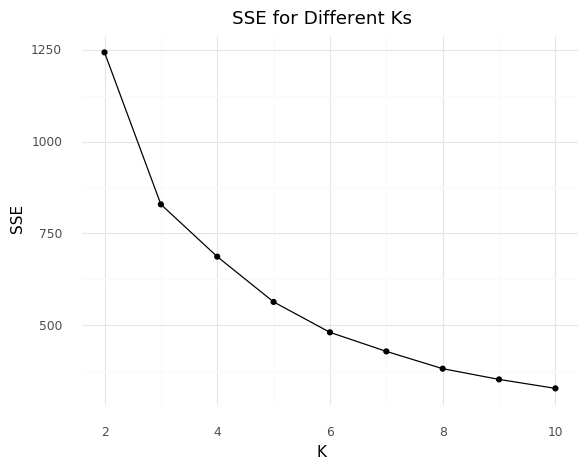

<ggplot: (8793807997645)>

In [75]:
pred = ["G", "A", "FC"]

ks = [2,3,4,5,6,7,8,9,10]
sse = []
sils = []

X = mls2018[pred]

z = StandardScaler()

X[pred] = z.fit_transform(X)

for k in ks:
    km = KMeans(n_clusters = k)
    km.fit(X)
    
    sse.append(km.inertia_)
    sils.append(silhouette_score(X, km.predict(X)))
    
sse_df = pd.DataFrame({"K": ks, "SSE": sse, "Silhouette": sils})
(ggplot(sse_df, aes(x = "K", y = "SSE")) + geom_point() + geom_line() + theme_minimal() +
labs(title = "SSE for Different Ks"))

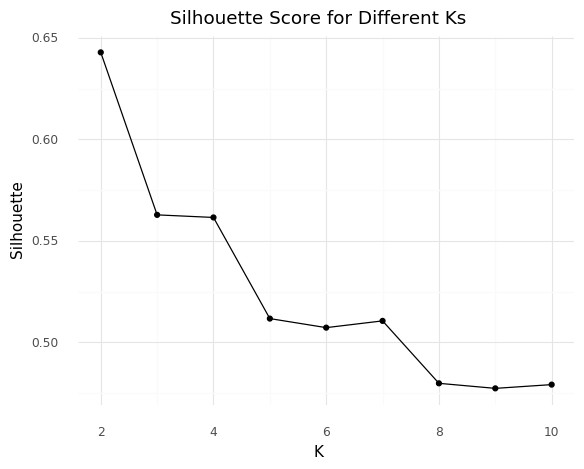

<ggplot: (8793808002326)>

In [76]:
(ggplot(sse_df, aes(x = "K", y = "Silhouette")) + geom_point() + 
geom_line() + 
theme_minimal() + 
labs(title = "Silhouette Score for Different Ks"))

In [77]:
km = KMeans(n_clusters = 4)
km.fit(X)

mls2018["cluster"] = km.predict(X)
mls2018.head()

,Player,Club,POS,GP,GS,MINS,G,A,SHTS,SOG,...,A/90min,FC,FS,OFF,YC,RC,SOG%,Year,Season,cluster
8337,Josef Martinez,ATL,F,34,34,2898,31,6,97,56,...,0.19,24,31,35,1,0,57.73,2018,reg,0
8338,Zlatan Ibrahimovic,LA,F,27,24,2143,22,10,116,49,...,0.42,36,34,27,5,1,42.24,2018,reg,0
8339,Bradley Wright-Phillips,LAFC,F,32,28,2536,20,8,82,37,...,0.28,32,55,31,7,0,45.12,2018,reg,0
8340,Mauro Manotas,HOU,F,33,30,2633,19,1,95,43,...,0.03,24,20,23,1,0,45.26,2018,reg,0
8341,Gyasi Zardes,CLB,F,33,33,2948,19,0,88,40,...,0.00,27,33,20,3,0,45.45,2018,reg,0


## Summarize Clusters


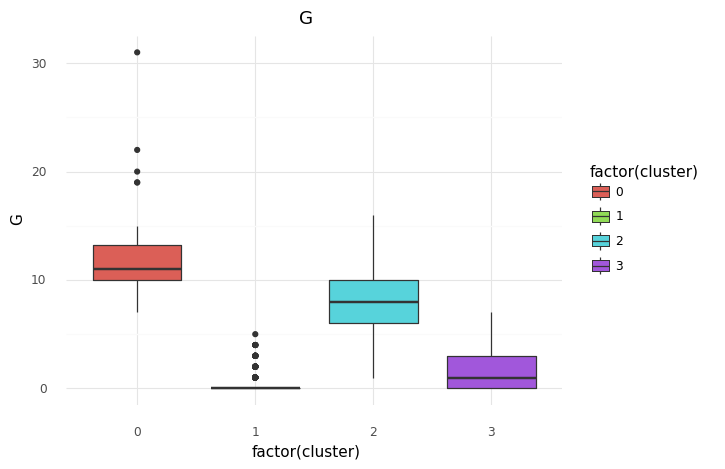

<ggplot: (8793809857181)>


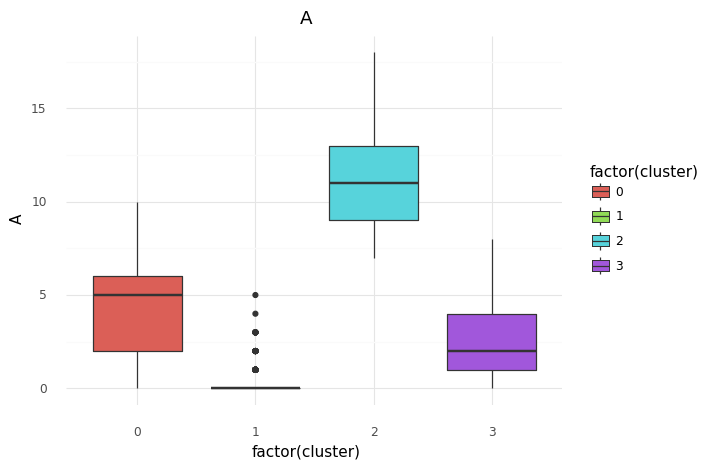

<ggplot: (8793808683960)>


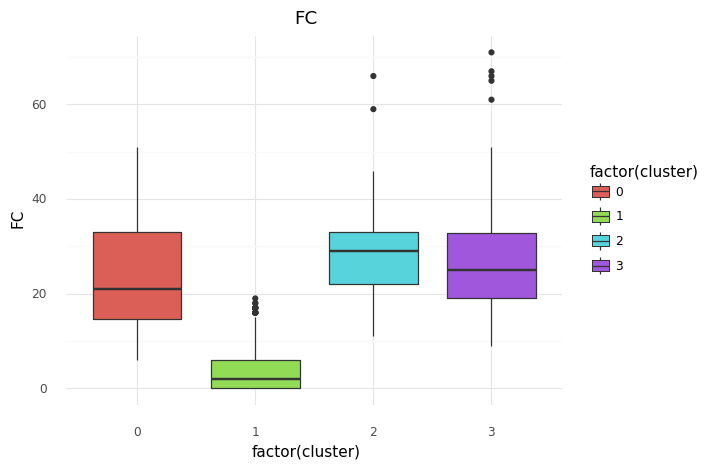

<ggplot: (8793808410980)>


In [78]:
for p in pred:
    print(ggplot(mls2018, aes(x = "factor(cluster)", y = p,
                             fill = "factor(cluster)")) +
         geom_boxplot() + theme_minimal() + 
         labs(title = p))

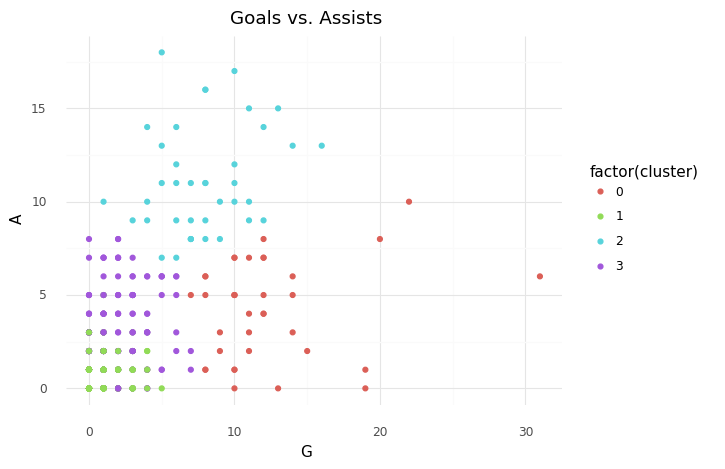

<ggplot: (8793808183562)>

In [79]:
(ggplot(mls2018, aes(x = "G", y = "A", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "A", title = "Goals vs. Assists"))

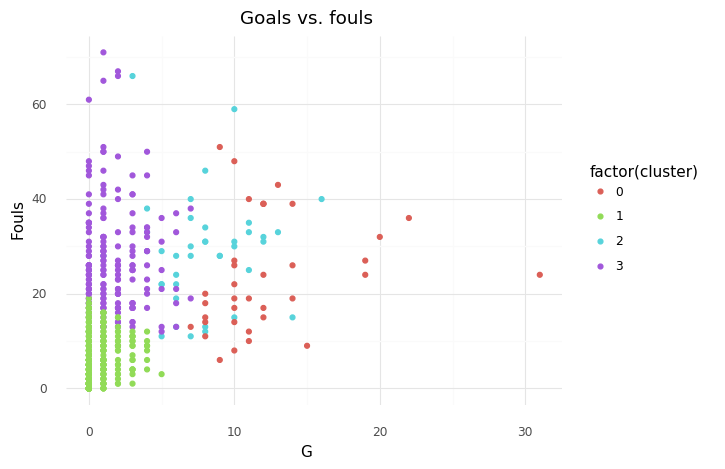

<ggplot: (8793810813016)>

In [80]:
(ggplot(mls2018, aes(x = "G", y = "FC", color = "factor(cluster)")) + 
geom_point() + theme_minimal() + labs(x = "G", y = "Fouls", title = "Goals vs. fouls"))

In [81]:
mls2018.groupby("cluster").mean()[["G", "A", "FC"]]

,G,A,FC
cluster,,,
0,12.277778,4.222222,23.944444
1,0.347518,0.317376,4.054965
2,7.871795,11.153846,29.000000
3,1.652632,2.531579,27.031579


In [82]:
mls2018.loc[mls2018.cluster == 3,"Player"].sample(10)

8673         Seth Sinovic
8488        Khiry Shelton
8436     Walker Zimmerman
8450            Alex Muyl
8408      Magnus Eriksson
8641      Johan Kappelhof
8957          Alexi Gomez
8533    Milton Valenzuela
8942           Aly Ghazal
8508        Andrew Wenger
Name: Player, dtype: object

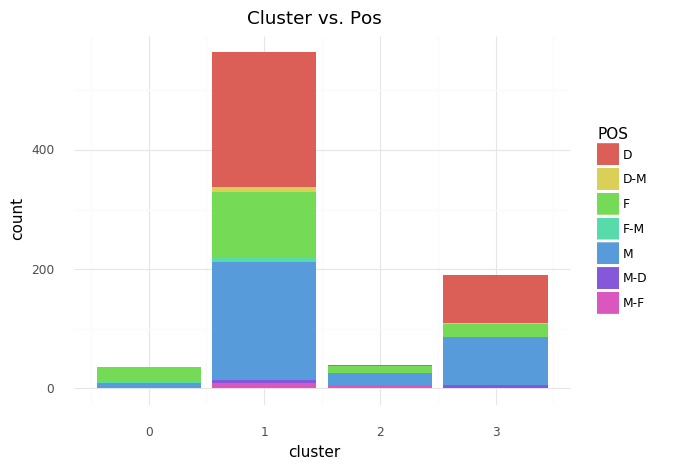

<ggplot: (8793810950196)>

In [83]:
(ggplot(mls2018, aes(x = "cluster", fill = "POS")) + geom_bar() + theme_minimal() + labs(title = "Cluster vs. Pos"))

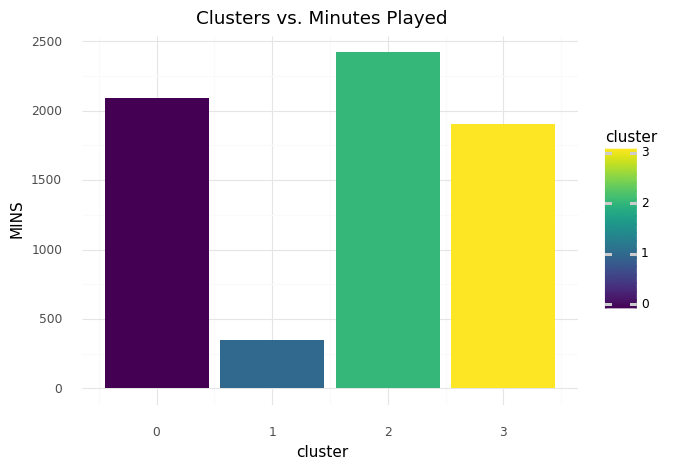

<ggplot: (8793810378536)>

In [84]:
(ggplot(mls2018, aes(x = "cluster", y = "MINS", fill = "cluster")) +
 stat_summary(fun_data = "mean_sdl", geom = "bar") +
theme_minimal() + labs(title = "Clusters vs. Minutes Played"))